<a href="https://colab.research.google.com/github/wjficap/wavefront/blob/main/seasonality_(8_charts)_v130924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 Top, 4 Bottom => 8 charts

[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 1927-12-30 to 2000-12-29.


[*********************100%***********************]  1 of 1 completed


Data is available from 2000-01-03 to 2024-09-16.


[*********************100%***********************]  1 of 1 completed


Data is available from 2000-01-03 to 2024-09-16.


[*********************100%***********************]  1 of 1 completed


Data is available from 2000-01-03 to 2024-09-16.


[*********************100%***********************]  1 of 1 completed


Data is available from 2000-01-03 to 2024-09-16.


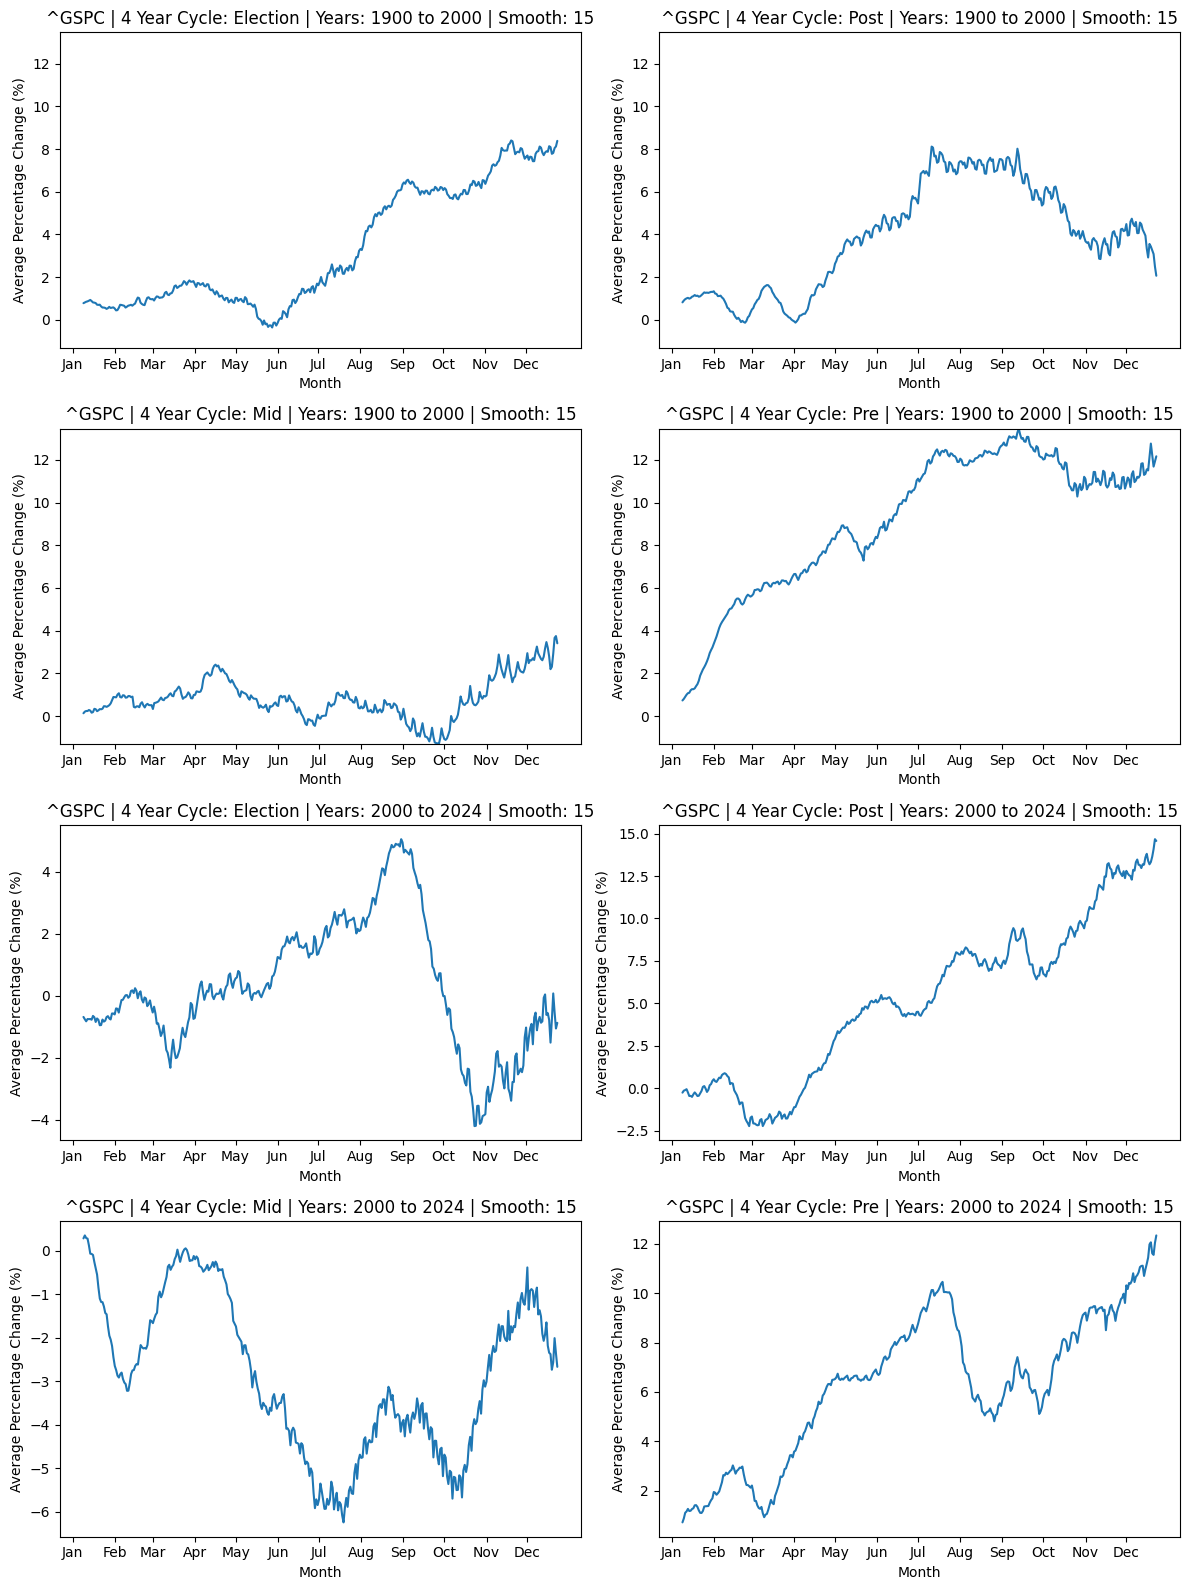

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_price_data(ticker, start_year, end_year):
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-31'
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Adj Close']]
    return data

def check_data_availability(data):
    if not data.empty:
        first_date = data.index[0]
        last_date = data.index[-1]
        print(f"Data is available from {first_date.date()} to {last_date.date()}.")
        return first_date, last_date
    else:
        print("No data is available.")
        return None, None

def filter_years_by_presidential_cycle(data, cycle_type):
    current_year = pd.to_datetime('now').year
    if cycle_type == 'Election':
        years = [year for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'Pre':
        years = [year - 1 for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'Mid':
        years = [year - 2 for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'Post':
        years = [year - 3 for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'All':
        years = data.index.year.unique()
    else:
        raise ValueError("Invalid cycle type.")
    filtered_data = data[data.index.year.isin(years)]
    return filtered_data

def normalize_and_average_data(data):
    normalized_data = pd.DataFrame()
    data.index = pd.to_datetime(data.index)
    for year in data.index.year.unique():
        yearly_data = data[data.index.year == year].copy()
        first_day_price = yearly_data['Adj Close'].iloc[0]
        yearly_data['PctChange'] = (yearly_data['Adj Close'] - first_day_price) / first_day_price * 100
        yearly_data['DayofYear'] = yearly_data.index.dayofyear
        yearly_data['Month'] = yearly_data.index.month
        normalized_data = pd.concat([normalized_data, yearly_data[['DayofYear', 'Month', 'PctChange']]], axis=0)
    averaged_data = normalized_data.groupby('DayofYear').mean()
    return averaged_data

def smoothen_data(averaged_data, window_size=10):
    averaged_data['SmoothedPctChange'] = averaged_data['PctChange'].rolling(window=window_size, center=True).mean()
    return averaged_data

def plot_averaged_data(ax, averaged_data, title, y_range):
    sns.set_style("whitegrid")
    averaged_data['Month'] = pd.to_datetime(averaged_data.index, origin='2023-01-01', unit='D').month
    ax.plot(averaged_data.index, averaged_data['SmoothedPctChange'])
    month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(month_ticks)
    ax.set_xticklabels(month_labels)
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Percentage Change (%)')
    ax.set_ylim(y_range)  # Set y-axis limits

def main(ticker, start_year, end_year, cycle_type, window_size=10):
    data = get_price_data(ticker, start_year, end_year)
    first_date, last_date = check_data_availability(data)
    if first_date is not None:
        filtered_data = filter_years_by_presidential_cycle(data, cycle_type)
        averaged_data = normalize_and_average_data(filtered_data)
        smoothed_data = smoothen_data(averaged_data, window_size=window_size)
        return smoothed_data, first_date, last_date
    return None, None, None

# REIT - RWR (2001) CLR.SI (2017) CFA.SI (2017) CJLU.SI (netlink 2017) O5RU.SI (aims 2007) AW9U.SI (first)
# 3Banks - D05.SI O37.SI U11.SI
# Index - ^GSPC ^NDX ^STI BTC-USD (BTC use 4 charts version) SGD=X

# Example usage for eight charts (two tickers)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Create a 4x2 grid of subplots

# First ticker parameters
ticker1 = "^GSPC"
start_year1 = 1900
end_year1 = 2000
window_size1 = 15
use_standard_yaxis_1 = True  # Toggle to standardize y-axis for first group of charts

# Second ticker parameters
ticker2 = "^GSPC"
start_year2 = 2000
end_year2 = 2024
window_size2 = 15
use_standard_yaxis_2 = False  # Toggle to standardize y-axis for second group of charts

# Define parameters for each set of charts (first and second ticker)
params1 = [
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Election", "window_size": window_size1},
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Post", "window_size": window_size1},
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Mid", "window_size": window_size1},
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Pre", "window_size": window_size1},
]

params2 = [
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Election", "window_size": window_size2},
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Post", "window_size": window_size2},
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Mid", "window_size": window_size2},
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Pre", "window_size": window_size2},
]

# Collect smoothed data and y-axis range for first ticker (only if standardization is enabled)
if use_standard_yaxis_1:
    all_smoothed_data1 = []
    for param in params1:
        smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
        if smoothed_data is not None:
            all_smoothed_data1.append(smoothed_data)

    all_pct_changes1 = pd.concat([data['SmoothedPctChange'] for data in all_smoothed_data1], axis=0)
    y_min1 = all_pct_changes1.min()
    y_max1 = all_pct_changes1.max()
    y_range1 = (y_min1, y_max1)

# Collect smoothed data and y-axis range for second ticker (only if standardization is enabled)
if use_standard_yaxis_2:
    all_smoothed_data2 = []
    for param in params2:
        smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
        if smoothed_data is not None:
            all_smoothed_data2.append(smoothed_data)

    all_pct_changes2 = pd.concat([data['SmoothedPctChange'] for data in all_smoothed_data2], axis=0)
    y_min2 = all_pct_changes2.min()
    y_max2 = all_pct_changes2.max()
    y_range2 = (y_min2, y_max2)

# Plot charts for the first ticker (first 2 rows: positions 0, 1, 2, 3)
for ax, param in zip(axes[:2].flatten(), params1):  # First 2 rows
    smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
    if smoothed_data is not None:
        chart_title = f'{param["ticker"]} | 4 Year Cycle: {param["cycle_type"]} | Years: {param["start_year"]} to {param["end_year"]} | Smooth: {param["window_size"]}'

        # Apply y-range if toggle is on
        if use_standard_yaxis_1:
            plot_averaged_data(ax, smoothed_data, chart_title, y_range1)
        else:
            plot_averaged_data(ax, smoothed_data, chart_title, None)  # Let matplotlib handle y-axis range

# Plot charts for the second ticker (next 2 rows: positions 4, 5, 6, 7)
for ax, param in zip(axes[2:].flatten(), params2):  # Last 2 rows
    smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
    if smoothed_data is not None:
        chart_title = f'{param["ticker"]} | 4 Year Cycle: {param["cycle_type"]} | Years: {param["start_year"]} to {param["end_year"]} | Smooth: {param["window_size"]}'

        # Apply y-range if toggle is on
        if use_standard_yaxis_2:
            plot_averaged_data(ax, smoothed_data, chart_title, y_range2)
        else:
            plot_averaged_data(ax, smoothed_data, chart_title, None)  # Let matplotlib handle y-axis range

# Adjust layout
plt.tight_layout()
plt.show()

# 4 Left, 4 Right => 8 charts

[*********************100%***********************]  1 of 1 completed


Data is available from 2010-10-21 to 2024-09-13.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data is available from 2010-10-21 to 2024-09-13.
Data is available from 2010-10-21 to 2024-09-13.
Data is available from 2010-10-21 to 2024-09-13.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data is available from 2012-03-01 to 2024-09-13.
Data is available from 2012-03-01 to 2024-09-13.
Data is available from 2012-03-01 to 2024-09-13.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data is available from 2012-03-01 to 2024-09-13.
Data is available from 2010-10-21 to 2024-09-13.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data is available from 2010-10-21 to 2024-09-13.
Data is available from 2010-10-21 to 2024-09-13.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data is available from 2010-10-21 to 2024-09-13.
Data is available from 2012-03-01 to 2024-09-13.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data is available from 2012-03-01 to 2024-09-13.
Data is available from 2012-03-01 to 2024-09-13.


[*********************100%***********************]  1 of 1 completed


Data is available from 2012-03-01 to 2024-09-13.


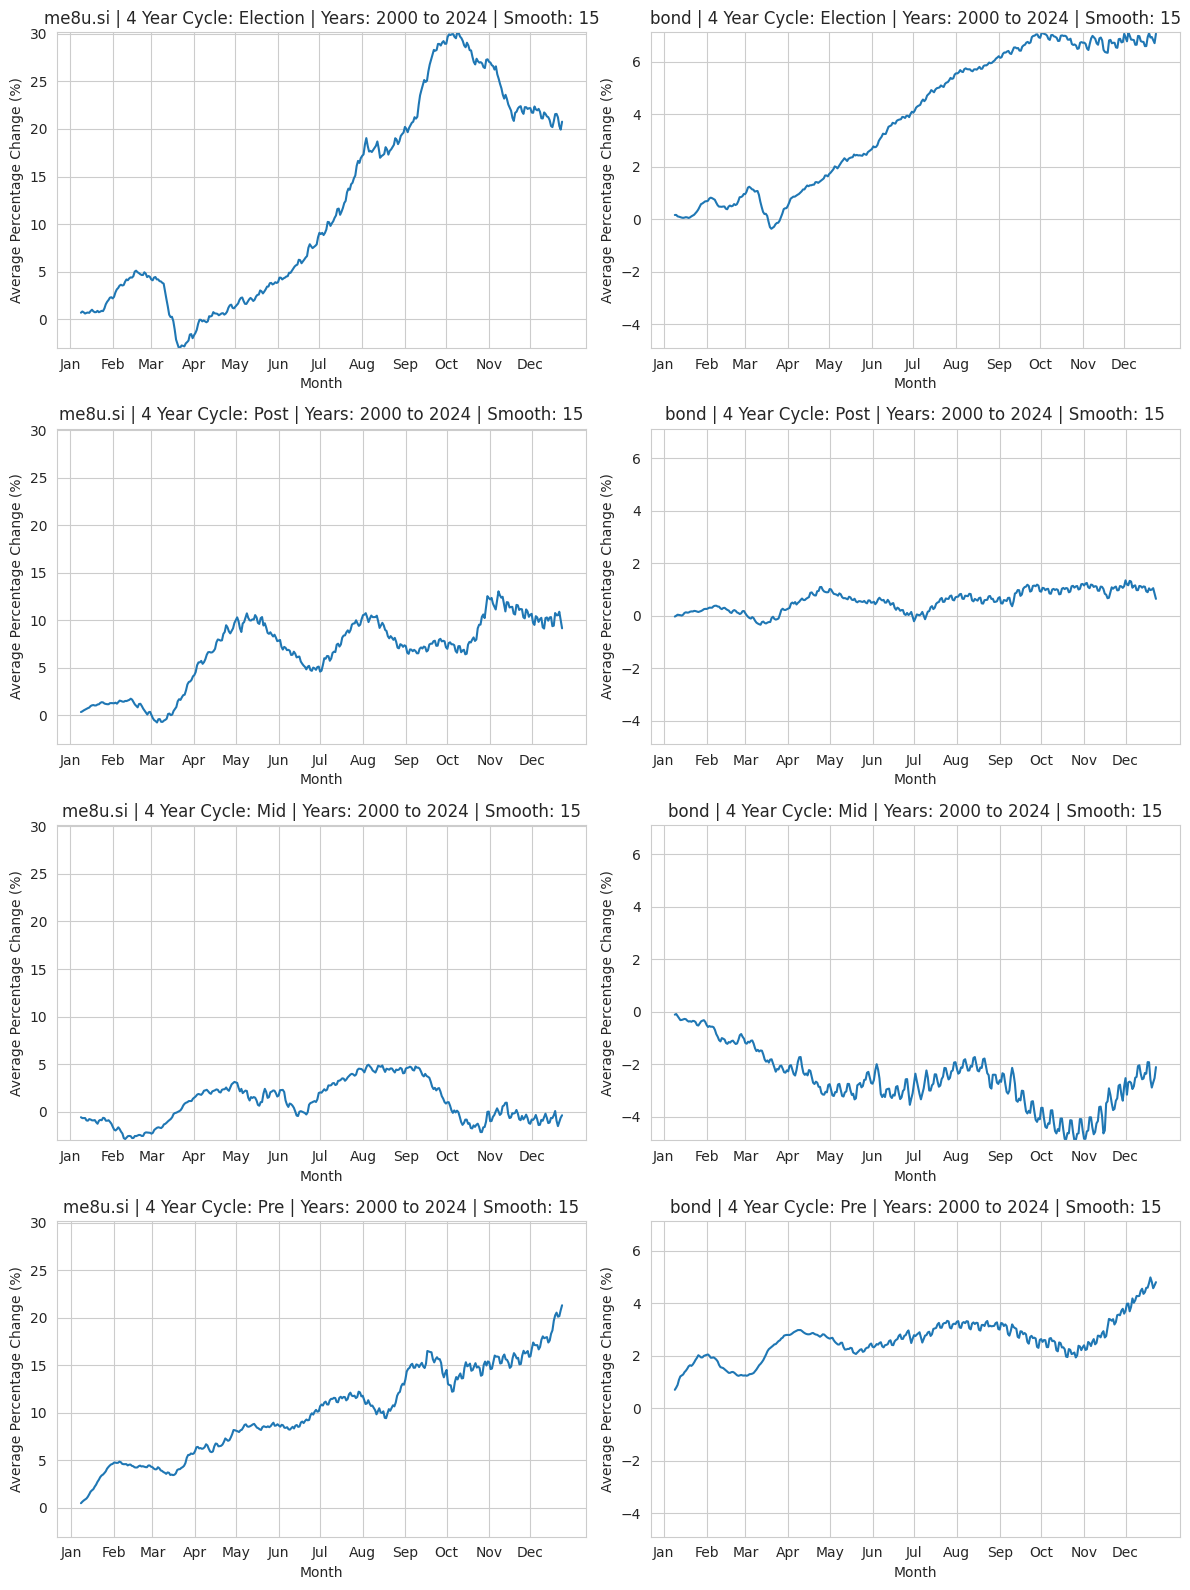

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_price_data(ticker, start_year, end_year):
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-31'
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Adj Close']]
    return data

def check_data_availability(data):
    if not data.empty:
        first_date = data.index[0]
        last_date = data.index[-1]
        print(f"Data is available from {first_date.date()} to {last_date.date()}.")
        return first_date, last_date
    else:
        print("No data is available.")
        return None, None

def filter_years_by_presidential_cycle(data, cycle_type):
    current_year = pd.to_datetime('now').year
    if cycle_type == 'Election':
        years = [year for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'Pre':
        years = [year - 1 for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'Mid':
        years = [year - 2 for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'Post':
        years = [year - 3 for year in range(current_year, current_year - 100, -4)]
    elif cycle_type == 'All':
        years = data.index.year.unique()
    else:
        raise ValueError("Invalid cycle type.")
    filtered_data = data[data.index.year.isin(years)]
    return filtered_data

def normalize_and_average_data(data):
    normalized_data = pd.DataFrame()
    data.index = pd.to_datetime(data.index)
    for year in data.index.year.unique():
        yearly_data = data[data.index.year == year].copy()
        first_day_price = yearly_data['Adj Close'].iloc[0]
        yearly_data['PctChange'] = (yearly_data['Adj Close'] - first_day_price) / first_day_price * 100
        yearly_data['DayofYear'] = yearly_data.index.dayofyear
        yearly_data['Month'] = yearly_data.index.month
        normalized_data = pd.concat([normalized_data, yearly_data[['DayofYear', 'Month', 'PctChange']]], axis=0)
    averaged_data = normalized_data.groupby('DayofYear').mean()
    return averaged_data

def smoothen_data(averaged_data, window_size=10):
    averaged_data['SmoothedPctChange'] = averaged_data['PctChange'].rolling(window=window_size, center=True).mean()
    return averaged_data

def plot_averaged_data(ax, averaged_data, title, y_range):
    sns.set_style("whitegrid")
    averaged_data['Month'] = pd.to_datetime(averaged_data.index, origin='2023-01-01', unit='D').month
    ax.plot(averaged_data.index, averaged_data['SmoothedPctChange'])
    month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(month_ticks)
    ax.set_xticklabels(month_labels)
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Percentage Change (%)')
    ax.set_ylim(y_range)  # Set y-axis limits

def main(ticker, start_year, end_year, cycle_type, window_size=10):
    data = get_price_data(ticker, start_year, end_year)
    first_date, last_date = check_data_availability(data)
    if first_date is not None:
        filtered_data = filter_years_by_presidential_cycle(data, cycle_type)
        averaged_data = normalize_and_average_data(filtered_data)
        smoothed_data = smoothen_data(averaged_data, window_size=window_size)
        return smoothed_data, first_date, last_date
    return None, None, None

# REIT - RWR (2001) CLR.SI (2017) CFA.SI (2017) CJLU.SI (netlink 2017) O5RU.SI (aims 2007) AW9U.SI (first) A17U.SI (areit 2005) C38U.SI (cmt 2007) me8U.SI (MIT)
# 3Banks - D05.SI O37.SI U11.SI
# Index - ^GSPC ^NDX TQQQ ^STI BTC-USD (BTC use 4 charts version) SGD=X

# Example usage for eight charts (two tickers)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Create a 4x2 grid of subplots

# First ticker parameters
ticker1 = "me8u.si"
start_year1 = 2000
end_year1 = 2024
window_size1 = 15
use_standard_yaxis_1 = True  # Toggle to standardize y-axis for first group of charts

# Second ticker parameters
ticker2 = "bond"
start_year2 = 2000
end_year2 = 2024
window_size2 = 15
use_standard_yaxis_2 = True  # Toggle to standardize y-axis for second group of charts

# Define parameters for each set of charts (first and second ticker)
params1 = [
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Election", "window_size": window_size1},
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Post", "window_size": window_size1},
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Mid", "window_size": window_size1},
    {"ticker": ticker1, "start_year": start_year1, "end_year": end_year1, "cycle_type": "Pre", "window_size": window_size1},
]

params2 = [
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Election", "window_size": window_size2},
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Post", "window_size": window_size2},
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Mid", "window_size": window_size2},
    {"ticker": ticker2, "start_year": start_year2, "end_year": end_year2, "cycle_type": "Pre", "window_size": window_size2},
]

# Collect smoothed data and y-axis range for first ticker (only if standardization is enabled)
if use_standard_yaxis_1:
    all_smoothed_data1 = []
    for param in params1:
        smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
        if smoothed_data is not None:
            all_smoothed_data1.append(smoothed_data)

    all_pct_changes1 = pd.concat([data['SmoothedPctChange'] for data in all_smoothed_data1], axis=0)
    y_min1 = all_pct_changes1.min()
    y_max1 = all_pct_changes1.max()
    y_range1 = (y_min1, y_max1)

# Collect smoothed data and y-axis range for second ticker (only if standardization is enabled)
if use_standard_yaxis_2:
    all_smoothed_data2 = []
    for param in params2:
        smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
        if smoothed_data is not None:
            all_smoothed_data2.append(smoothed_data)

    all_pct_changes2 = pd.concat([data['SmoothedPctChange'] for data in all_smoothed_data2], axis=0)
    y_min2 = all_pct_changes2.min()
    y_max2 = all_pct_changes2.max()
    y_range2 = (y_min2, y_max2)

# Plot charts for the first ticker (first 2 rows: positions 0, 1, 2, 3)
for ax, param in zip(axes[:4, 0].flatten(), params1):  # First 2 rows
    smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
    if smoothed_data is not None:
        chart_title = f'{param["ticker"]} | 4 Year Cycle: {param["cycle_type"]} | Years: {param["start_year"]} to {param["end_year"]} | Smooth: {param["window_size"]}'

        # Apply y-range if toggle is on
        if use_standard_yaxis_1:
            plot_averaged_data(ax, smoothed_data, chart_title, y_range1)
        else:
            plot_averaged_data(ax, smoothed_data, chart_title, None)  # Let matplotlib handle y-axis range

# Plot charts for the second ticker (next 2 rows: positions 4, 5, 6, 7)
for ax, param in zip(axes[:4, 1].flatten(), params2):  # Last 2 rows
    smoothed_data, first_date, last_date = main(param["ticker"], param["start_year"], param["end_year"], param["cycle_type"], param["window_size"])
    if smoothed_data is not None:
        chart_title = f'{param["ticker"]} | 4 Year Cycle: {param["cycle_type"]} | Years: {param["start_year"]} to {param["end_year"]} | Smooth: {param["window_size"]}'

        # Apply y-range if toggle is on
        if use_standard_yaxis_2:
            plot_averaged_data(ax, smoothed_data, chart_title, y_range2)
        else:
            plot_averaged_data(ax, smoothed_data, chart_title, None)  # Let matplotlib handle y-axis range

# Adjust layout
plt.tight_layout()
plt.show()